In [1]:
import warnings
warnings.filterwarnings("ignore")


#**GARCH Model for  BUCHAREST Stock  Forecasting**
Model is used to forecast the volatility (jump) instead of actual price.

In [2]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 15.1 MB/s eta 0:00:00


In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
import numpy as np
import scipy.stats as stats

#**BUCHAREST Stock Exchange Top 10 Stocks Volatillity**

In [6]:
bvb_tickers = ['TLV.RO', 'SNP.RO', 'FP.RO', 'BRD.RO', 'TGN.RO',
               'M.RO', 'SFG.RO', 'SNG.RO', 'WINE.RO', 'DIGI.RO']

start_date = '1900-01-01'
end_date = '2023-01-01'

data = yf.download(bvb_tickers, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  10 of 10 completed


In [8]:



data.to_csv('BUX_stock_data.csv')
print("Data saved to BUX_stock_data.csv")

Data saved to BUX_stock_data.csv


In [9]:
print(data.head())


Ticker                           BRD.RO  DIGI.RO  FP.RO  M.RO  SFG.RO  SNG.RO  \
Date                                                                            
2001-01-18 00:00:00+00:00  53656.539062      NaN    NaN   NaN     NaN     NaN   
2001-01-19 00:00:00+00:00  55958.621094      NaN    NaN   NaN     NaN     NaN   
2001-01-22 00:00:00+00:00  54187.789062      NaN    NaN   NaN     NaN     NaN   
2001-01-23 00:00:00+00:00  53125.285156      NaN    NaN   NaN     NaN     NaN   
2001-01-24 00:00:00+00:00  53125.285156      NaN    NaN   NaN     NaN     NaN   

Ticker                     SNP.RO  TGN.RO  TLV.RO  WINE.RO  
Date                                                        
2001-01-18 00:00:00+00:00     NaN     NaN     NaN      NaN  
2001-01-19 00:00:00+00:00     NaN     NaN     NaN      NaN  
2001-01-22 00:00:00+00:00     NaN     NaN     NaN      NaN  
2001-01-23 00:00:00+00:00     NaN     NaN     NaN      NaN  
2001-01-24 00:00:00+00:00     NaN     NaN     NaN      NaN  




### 1. **TLV.RO** - **Banca Transilvania**  
   - **Sector**: Banking & Financial Services  
   - **Overview**: Banca Transilvania is the largest bank in Romania by assets. It provides a wide range of financial services, including retail and corporate banking, leasing, and insurance.  
   - **Significance**: A key player in Romania's banking sector, often considered a bellwether for the country’s economic health.

---

### 2. **SNP.RO** - **OMV Petrom**  
   - **Sector**: Oil & Gas  
   - **Overview**: OMV Petrom is the largest energy company in Southeastern Europe. It engages in oil and gas exploration, production, refining, and distribution.  
   - **Significance**: Crucial for Romania's energy sector, supplying fuel and other energy products domestically and internationally.

---

### 3. **FP.RO** - **Fondul Proprietatea**  
   - **Sector**: Investment Fund  
   - **Overview**: Fondul Proprietatea is an investment fund created to compensate Romanians whose properties were confiscated during the communist era. It holds stakes in several important Romanian companies, including utilities and energy firms.  
   - **Significance**: Plays a major role in Romania's capital market and has a diversified portfolio.

---

### 4. **BRD.RO** - **BRD Groupe Société Générale**  
   - **Sector**: Banking & Financial Services  
   - **Overview**: BRD is one of the largest banks in Romania and is part of the Société Générale Group. It offers a full range of financial products and services.  
   - **Significance**: A major contributor to Romania's financial infrastructure with strong corporate and retail banking divisions.

---

### 5. **TGN.RO** - **Transgaz**  
   - **Sector**: Energy Infrastructure  
   - **Overview**: Transgaz is Romania’s national natural gas transmission company. It operates the domestic gas pipeline network and ensures the country's energy security.  
   - **Significance**: A strategic company in Romania’s energy sector, facilitating gas distribution and export.

---

### 6. **M.RO** - **MedLife**  
   - **Sector**: Healthcare  
   - **Overview**: MedLife is the largest private healthcare provider in Romania. It operates clinics, hospitals, and diagnostic centers.  
   - **Significance**: Represents the growing private healthcare industry in Romania.

---

### 7. **SFG.RO** - **Sphera Franchise Group**  
   - **Sector**: Food & Beverage  
   - **Overview**: Sphera Franchise Group is a leading operator of food service brands in Romania, including franchises like KFC, Pizza Hut, and Taco Bell.  
   - **Significance**: A strong player in Romania’s food and hospitality industry.

---

### 8. **SNG.RO** - **Romgaz**  
   - **Sector**: Energy  
   - **Overview**: Romgaz is Romania’s largest natural gas producer and supplier. It explores, produces, and distributes natural gas domestically and internationally.  
   - **Significance**: A critical company in the energy sector, helping Romania reduce dependence on imported energy.

---

### 9. **WINE.RO** - **Purcari Wineries**  
   - **Sector**: Consumer Goods (Wine Production)  
   - **Overview**: Purcari Wineries is one of the leading wine producers in Eastern Europe, known for its premium wines and exports to international markets.  
   - **Significance**: Represents Romania's agricultural and consumer goods sector on the global stage.

---

### 10. **DIGI.RO** - **Digi Communications**  
   - **Sector**: Telecommunications  
   - **Overview**: Digi Communications is a leading provider of telecommunication services in Romania, offering cable TV, broadband, and mobile services.  
   - **Significance**: A major player in Romania’s telecommunications industry, driving connectivity and technological advancements.

---


In [10]:
data.head()

Ticker,BRD.RO,DIGI.RO,FP.RO,M.RO,SFG.RO,SNG.RO,SNP.RO,TGN.RO,TLV.RO,WINE.RO
Date,,,,,,,,,,
2001-01-18 00:00:00+00:00,53656.539062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-19 00:00:00+00:00,55958.621094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-22 00:00:00+00:00,54187.789062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-23 00:00:00+00:00,53125.285156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-24 00:00:00+00:00,53125.285156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
returns = data.pct_change().dropna()

# Here we create an empty dictionary to store the GARCH model results for each stock
# Set up GARCH modeling for each stock

In [12]:

garch_results = {}
for ticker in bvb_tickers:
    model = arch_model(returns[ticker], vol='Garch', p=1, q=1)
    garch_results[ticker] = model.fit(disp='off')
    print(f"GARCH Model fit for {ticker} complete.")

GARCH Model fit for TLV.RO complete.
GARCH Model fit for SNP.RO complete.
GARCH Model fit for FP.RO complete.
GARCH Model fit for BRD.RO complete.
GARCH Model fit for TGN.RO complete.
GARCH Model fit for M.RO complete.
GARCH Model fit for SFG.RO complete.
GARCH Model fit for SNG.RO complete.
GARCH Model fit for WINE.RO complete.
GARCH Model fit for DIGI.RO complete.


The Visualization  Part For the Bucharest Aviv Stocks

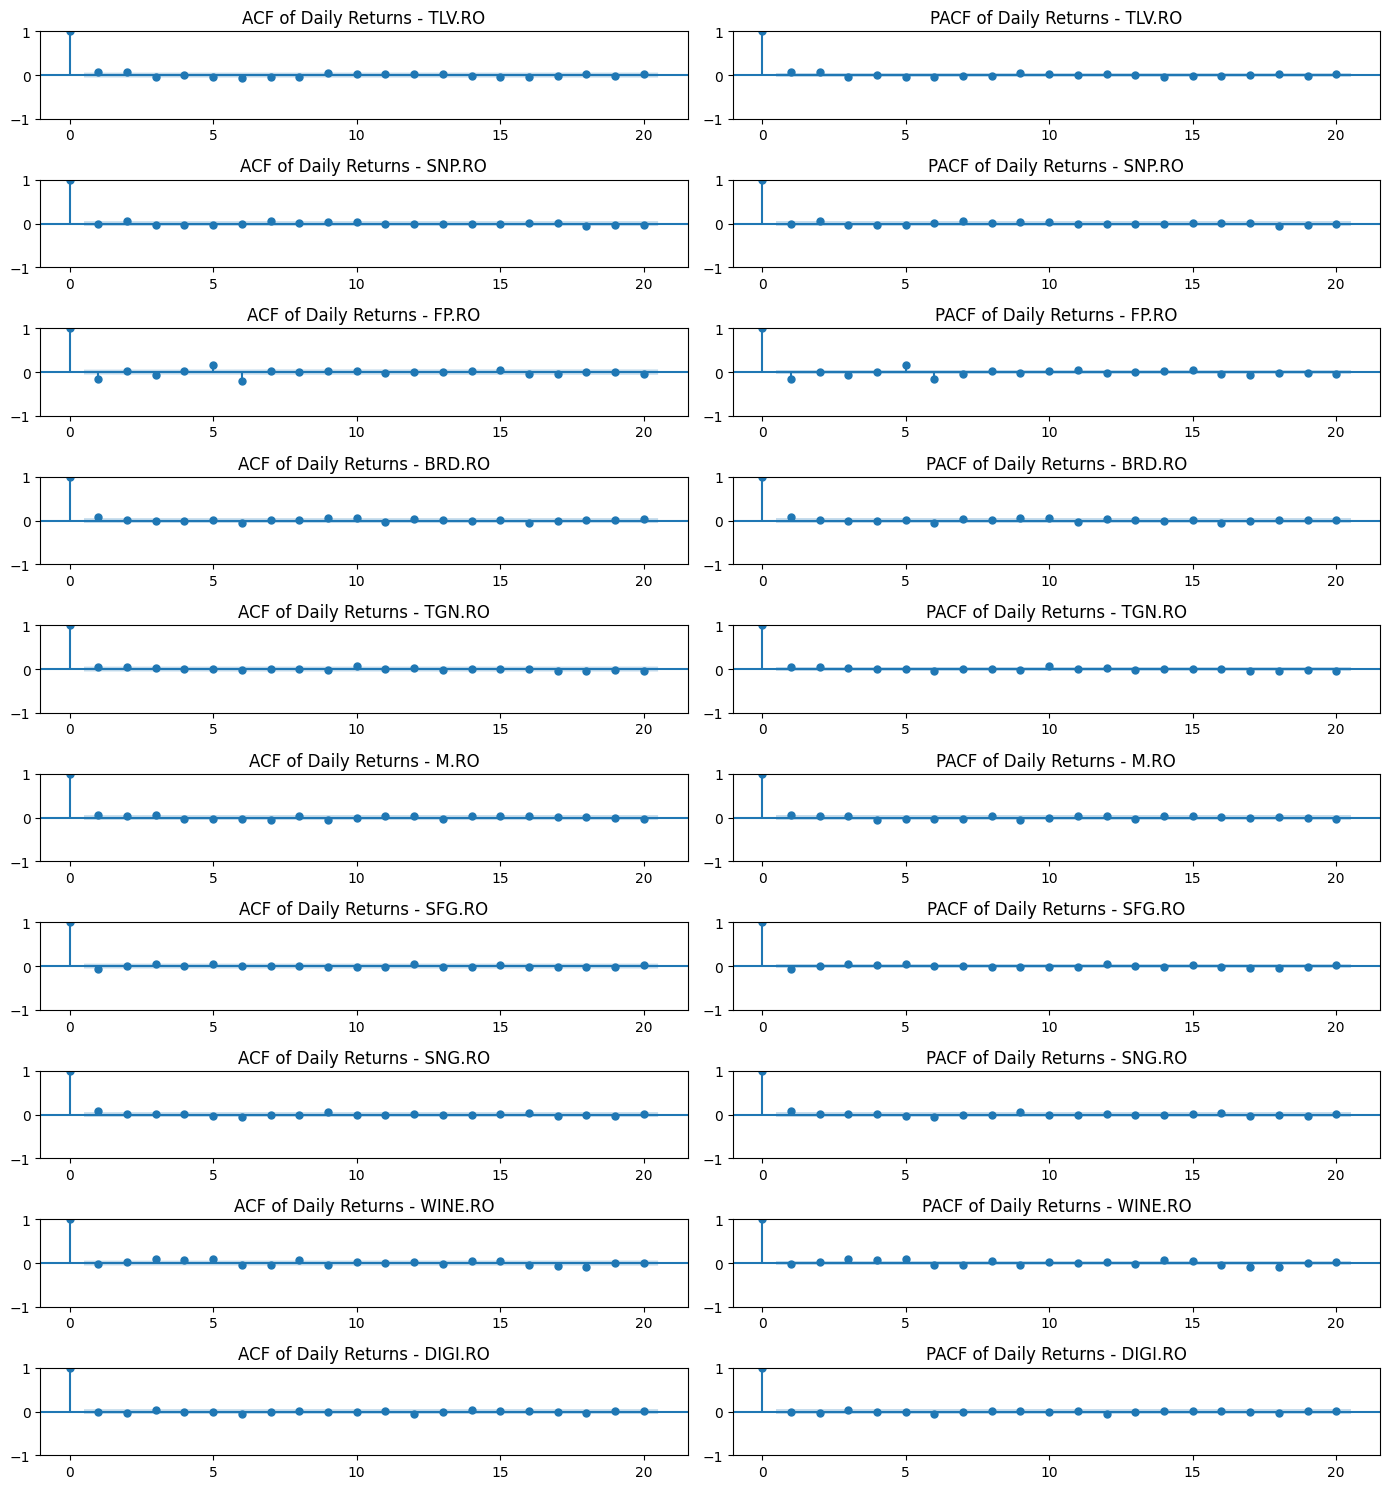

In [13]:
plt.figure(figsize=(14, 15))

for i, ticker in enumerate(bvb_tickers):
    # ACF Plot
    plt.subplot(10, 2, 2 * i + 1)
    plot_acf(returns[ticker], ax=plt.gca(), lags=20)
    plt.title(f"ACF of Daily Returns - {ticker}")

    # PACF Plot
    plt.subplot(10, 2, 2 * i + 2)
    plot_pacf(returns[ticker], ax=plt.gca(), lags=20)
    plt.title(f"PACF of Daily Returns - {ticker}")

plt.tight_layout()
plt.show()


The Above we can see the ACF And PACF Plots for the data  which is   provided  via visuallization for all the shares

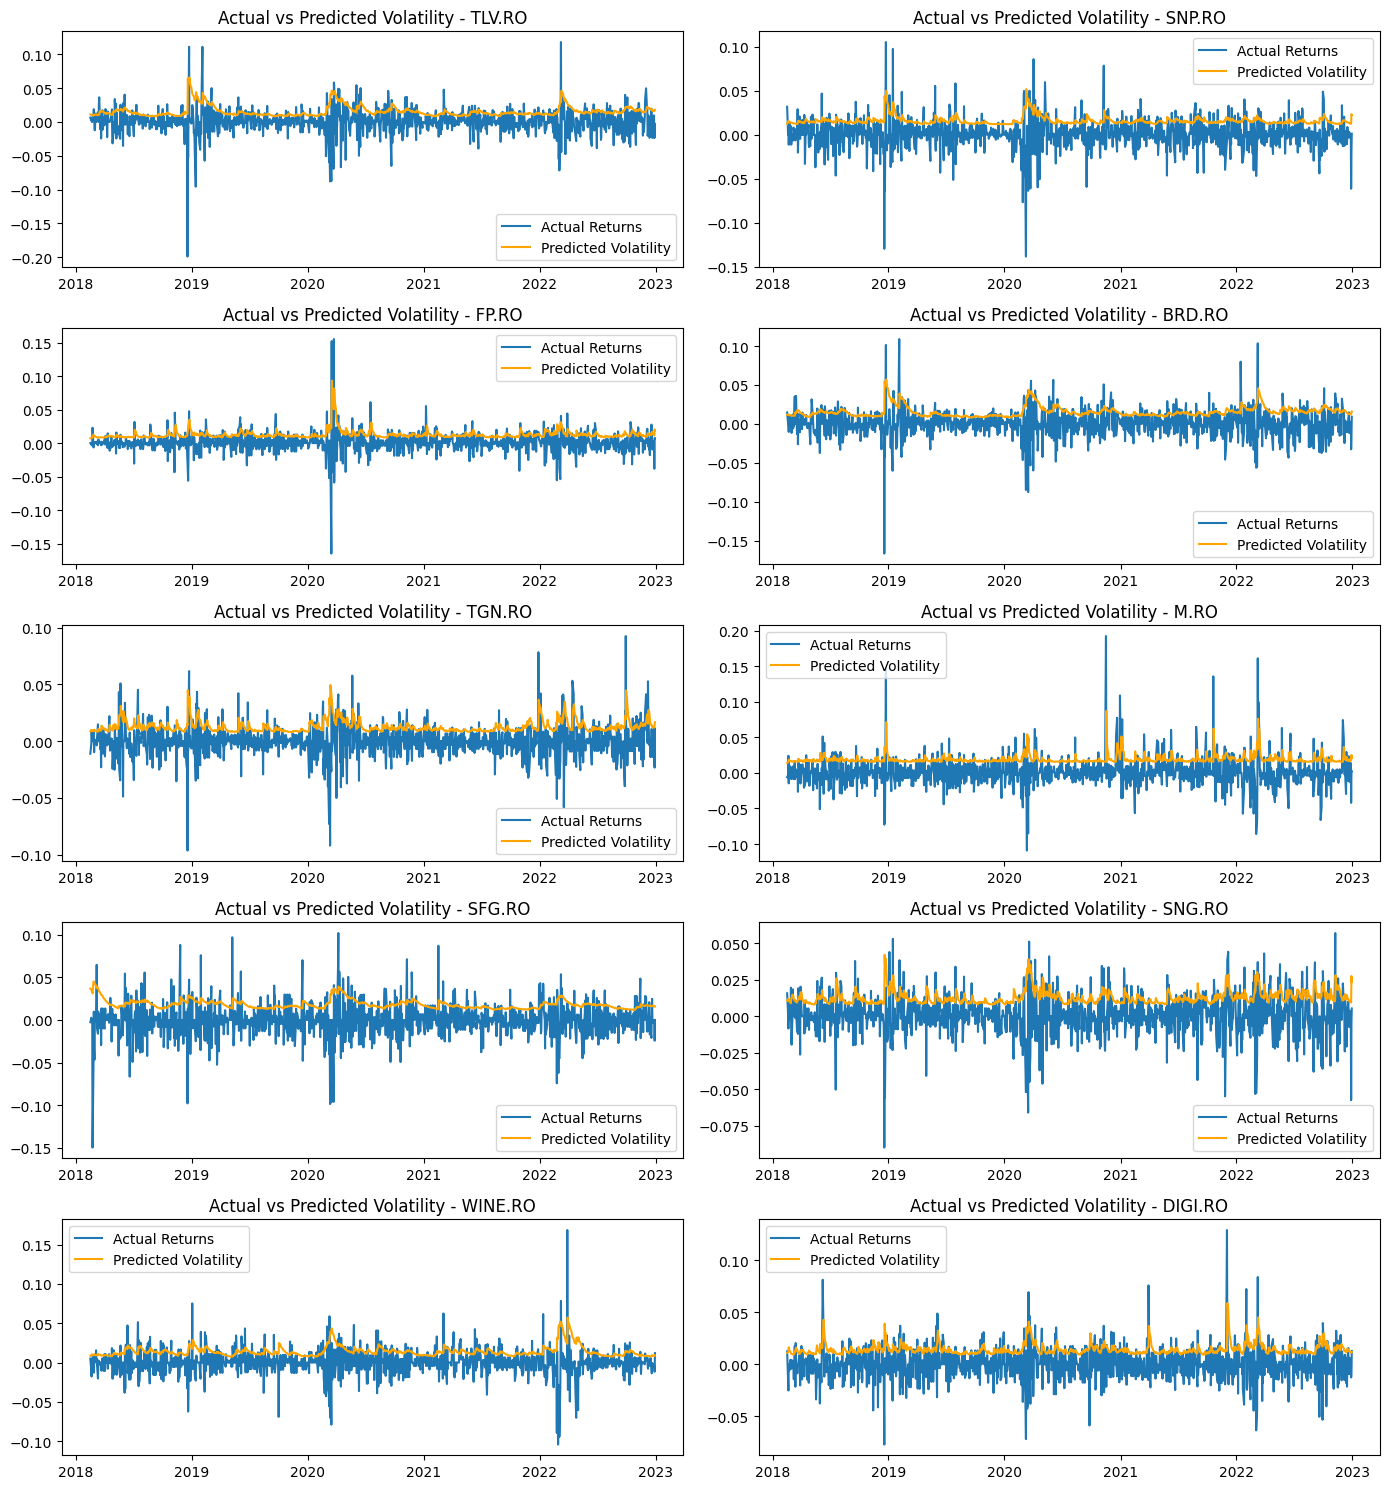

In [14]:
plt.figure(figsize=(14, 15))
for i, ticker in enumerate(bvb_tickers):
    plt.subplot(5, 2, i + 1)
    garch_volatility = garch_results[ticker].conditional_volatility
    plt.plot(returns[ticker], label='Actual Returns')
    plt.plot(garch_volatility, color='orange', label='Predicted Volatility')
    plt.title(f'Actual vs Predicted Volatility - {ticker}')
    plt.legend()

plt.tight_layout()
plt.show()

The Above we  see  the  comparision and relationship between the   the actual and predicted  volatillity of the shares

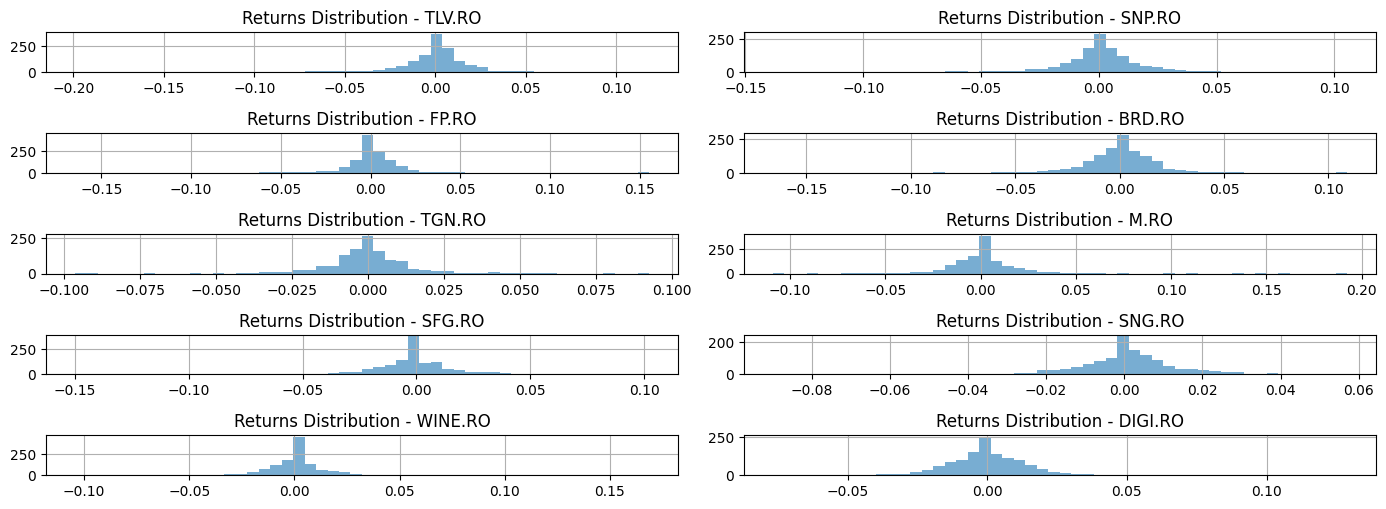

In [19]:
plt.figure(figsize=(14, 10))
for i, ticker in enumerate(bvb_tickers):
    plt.subplot(10, 2, i+1)
    returns[ticker].hist(bins=50, alpha=0.6)
    plt.title(f'Returns Distribution - {ticker}')

plt.tight_layout()
plt.show()

the distribution of the volatillity

In [20]:
print("\nLjung-Box Test Results for GARCH Model Residuals")
for ticker in bvb_tickers:
    lb_test = acorr_ljungbox(garch_results[ticker].resid, lags=[10], return_df=True)
    print(f"\n{ticker} Ljung-Box Test:\n{lb_test}")


Ljung-Box Test Results for GARCH Model Residuals

TLV.RO Ljung-Box Test:
      lb_stat  lb_pvalue
10  23.879687   0.007926

SNP.RO Ljung-Box Test:
     lb_stat  lb_pvalue
10  17.94521   0.055895

FP.RO Ljung-Box Test:
       lb_stat     lb_pvalue
10  122.295934  1.729660e-21

BRD.RO Ljung-Box Test:
      lb_stat  lb_pvalue
10  20.127365   0.028071

TGN.RO Ljung-Box Test:
      lb_stat  lb_pvalue
10  17.512776    0.06376

M.RO Ljung-Box Test:
      lb_stat  lb_pvalue
10  20.759565   0.022834

SFG.RO Ljung-Box Test:
      lb_stat  lb_pvalue
10  12.018227   0.283838

SNG.RO Ljung-Box Test:
      lb_stat  lb_pvalue
10  18.783132   0.043105

WINE.RO Ljung-Box Test:
      lb_stat  lb_pvalue
10  40.270939   0.000015

DIGI.RO Ljung-Box Test:
     lb_stat  lb_pvalue
10  6.932516     0.7318


The above provides the  Ljung  Box test for each of the available tickers present and use for the operations

The Ljung-Box test is a statistical test used to check whether a series exhibits autocorrelation at specific lags. In the context of GARCH model residuals, the test assesses whether the residuals are independently distributed (i.e., no significant autocorrelation remains after modeling).

### Key Outputs:
- **`lb_stat`**: The Ljung-Box test statistic.
- **`lb_pvalue`**: The p-value corresponding to the test statistic, which helps determine the significance of the autocorrelation.

---

### Interpretation for Each Stock:

#### 1. **`TLV.RO`**:
- **`lb_stat` = 23.88**, **`p-value` = 0.0079**:
  - The p-value is less than 0.05, indicating significant autocorrelation in the residuals. The GARCH model may not have captured all the patterns in the data.

#### 2. **`SNP.RO`**:
- **`lb_stat` = 17.94**, **`p-value` = 0.0559**:
  - The p-value is slightly above 0.05, suggesting weak evidence of autocorrelation. The residuals are close to being independent.

#### 3. **`FP.RO`**:
- **`lb_stat` = 122.30**, **`p-value` = 1.73e-21**:
  - The extremely small p-value indicates strong autocorrelation in the residuals. The GARCH model has not adequately captured the dynamics.

#### 4. **`BRD.RO`**:
- **`lb_stat` = 20.13**, **`p-value` = 0.0281**:
  - The p-value is below 0.05, showing significant autocorrelation in the residuals. Improvements to the model are likely needed.

#### 5. **`TGN.RO`**:
- **`lb_stat` = 17.51**, **`p-value` = 0.0638**:
  - The p-value is above 0.05, implying no significant autocorrelation. The model performs adequately for this stock.

#### 6. **`M.RO`**:
- **`lb_stat` = 20.76**, **`p-value` = 0.0228**:
  - A p-value below 0.05 shows significant autocorrelation. The model needs refinement.

#### 7. **`SFG.RO`**:
- **`lb_stat` = 12.02**, **`p-value` = 0.2838**:
  - The high p-value indicates no significant autocorrelation. The residuals are independent.

#### 8. **`SNG.RO`**:
- **`lb_stat` = 18.78**, **`p-value` = 0.0431**:
  - The p-value below 0.05 indicates significant autocorrelation. Model adjustments are needed.

#### 9. **`WINE.RO`**:
- **`lb_stat` = 40.27**, **`p-value` = 0.000015**:
  - A very small p-value suggests strong autocorrelation. The GARCH model did not capture the series' dynamics well.

#### 10. **`DIGI.RO`**:
- **`lb_stat` = 6.93**, **`p-value` = 0.7318**:
  - The high p-value suggests no significant autocorrelation. The model performs well for this stock.

---



In [21]:
print("\nSkewness and Kurtosis for Returns and Residuals")
for ticker in bvb_tickers:
    returns_skewness = stats.skew(returns[ticker])
    returns_kurtosis = stats.kurtosis(returns[ticker])
    residuals_skewness = stats.skew(garch_results[ticker].resid)
    residuals_kurtosis = stats.kurtosis(garch_results[ticker].resid)
    print(f"\n{ticker} - Returns: Skewness={returns_skewness:.2f}, Kurtosis={returns_kurtosis:.2f}")
    print(f"{ticker} - Residuals: Skewness={residuals_skewness:.2f}, Kurtosis={residuals_kurtosis:.2f}")


Skewness and Kurtosis for Returns and Residuals

TLV.RO - Returns: Skewness=-1.12, Kurtosis=19.80
TLV.RO - Residuals: Skewness=-1.12, Kurtosis=19.80

SNP.RO - Returns: Skewness=-0.62, Kurtosis=11.23
SNP.RO - Residuals: Skewness=-0.62, Kurtosis=11.23

FP.RO - Returns: Skewness=0.56, Kurtosis=36.11
FP.RO - Residuals: Skewness=0.56, Kurtosis=36.11

BRD.RO - Returns: Skewness=-0.52, Kurtosis=12.17
BRD.RO - Residuals: Skewness=-0.52, Kurtosis=12.17

TGN.RO - Returns: Skewness=0.02, Kurtosis=7.97
TGN.RO - Residuals: Skewness=0.02, Kurtosis=7.97

M.RO - Returns: Skewness=1.79, Kurtosis=16.77
M.RO - Residuals: Skewness=1.79, Kurtosis=16.77

SFG.RO - Returns: Skewness=-0.23, Kurtosis=8.00
SFG.RO - Residuals: Skewness=-0.23, Kurtosis=8.00

SNG.RO - Returns: Skewness=-0.47, Kurtosis=4.21
SNG.RO - Residuals: Skewness=-0.47, Kurtosis=4.21

WINE.RO - Returns: Skewness=0.32, Kurtosis=17.03
WINE.RO - Residuals: Skewness=0.32, Kurtosis=17.03

DIGI.RO - Returns: Skewness=0.65, Kurtosis=7.57
DIGI.RO - R


1. **TEVA.TA** and **ELCO.TA** have exceptionally high skewness and kurtosis, indicating extreme asymmetry and heavy tails in returns, which may reflect rare, large price movements or volatility spikes.
2. **PTNR.TA** and **NICE.TA** show lower skewness and kurtosis, closer to normality, with slight positive skewness and moderate tails.
3. **ICL.TA** and **ORL.TA** have moderate kurtosis, suggesting occasional large price changes.


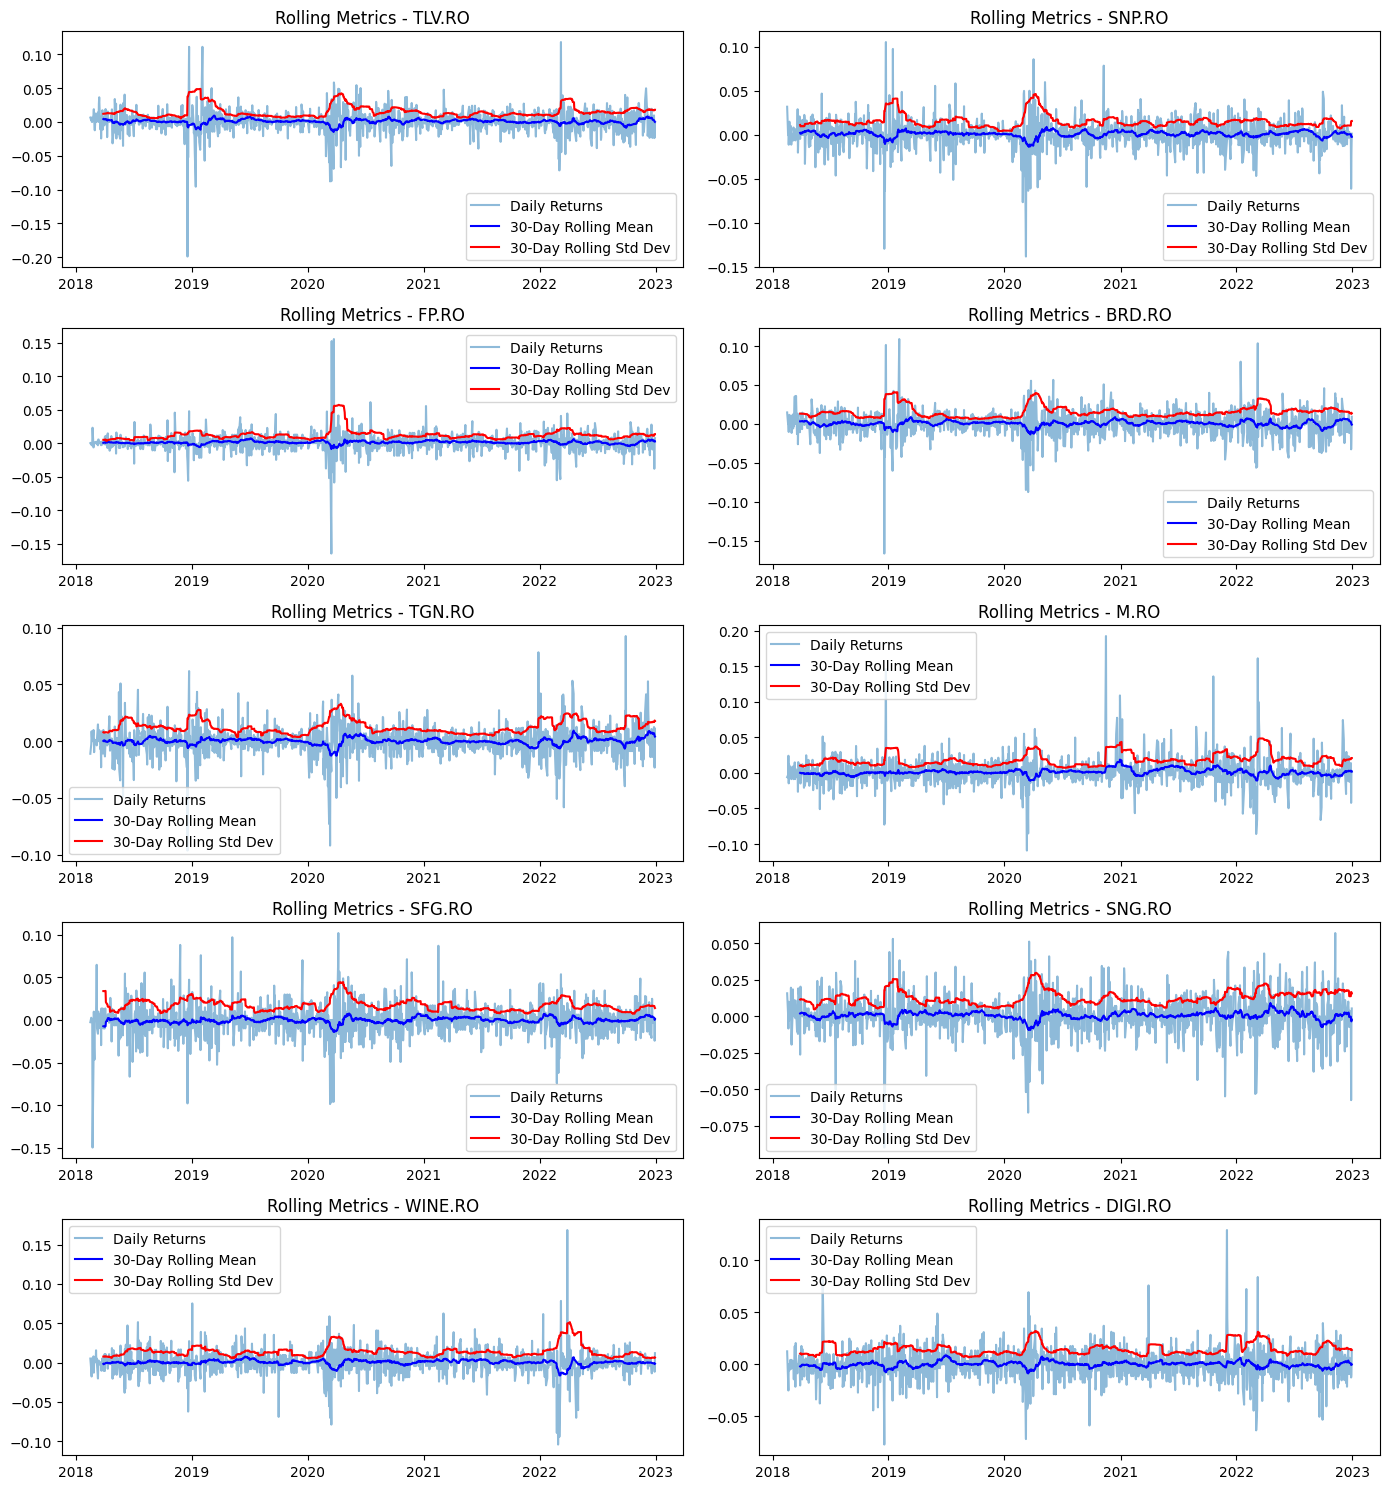

In [22]:
plt.figure(figsize=(14, 15))
for i, ticker in enumerate(bvb_tickers):
    plt.subplot(5, 2, i + 1)
    rolling_mean = returns[ticker].rolling(window=30).mean()
    rolling_std = returns[ticker].rolling(window=30).std()
    plt.plot(returns[ticker], label='Daily Returns', alpha=0.5)
    plt.plot(rolling_mean, label='30-Day Rolling Mean', color='blue')
    plt.plot(rolling_std, label='30-Day Rolling Std Dev', color='red')
    plt.title(f'Rolling Metrics - {ticker}')
    plt.legend()

plt.tight_layout()
plt.show()

we get a  rough idea of  rolling mean and  std dev  from the above for each shares

In [23]:
for ticker in bvb_tickers:
    print(f"\n=== Actual and Predicted Volatility for {ticker} ===")
    actual_returns = returns[ticker]
    predicted_volatility = garch_results[ticker].conditional_volatility
    combined_df = pd.DataFrame({
        'Actual Returns': actual_returns,
        'Predicted Volatility': predicted_volatility
    })
    print(combined_df)


=== Actual and Predicted Volatility for TLV.RO ===
                           Actual Returns  Predicted Volatility
Date                                                           
2018-02-16 00:00:00+00:00        0.006452              0.011136
2018-02-19 00:00:00+00:00        0.002137              0.010855
2018-02-20 00:00:00+00:00        0.006397              0.010483
2018-02-21 00:00:00+00:00        0.000000              0.010264
2018-02-22 00:00:00+00:00        0.000000              0.009952
...                                   ...                   ...
2022-12-23 00:00:00+00:00        0.002415              0.017412
2022-12-27 00:00:00+00:00        0.009639              0.016524
2022-12-28 00:00:00+00:00       -0.023866              0.015913
2022-12-29 00:00:00+00:00       -0.022983              0.017110
2022-12-30 00:00:00+00:00       -0.003003              0.017977

[1248 rows x 2 columns]

=== Actual and Predicted Volatility for SNP.RO ===
                           Actual Retur

**Conclusion:**

we  have applied the   garch model  over the  huge amount of BUCHAREST shares data and thus  used many tests and  visualizations to get the  efficeint  results